# Titanic: Machine Learning from Disaster
Overview
The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)
The training set would be used to build our machine learning models. For the training set, it provided the outcome for each passenger. the model will be based on “features” like passengers’ gender and class,  and also used feature engineering to create new features.

The test set data would be used to see how well  model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

* Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
#### To build a classifier to predict a Survived and non Survived passanger. The data was examined for patterns & distributions using the statistical summaries and was prepared to build a Logistic Regression model. Factors, that had a significant impact on survieved passangers, were identified and prioritized.which help to build a model and with greater accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data
 lets start reading in the titanic_train.csv file a padas datafram.

In [1]:
train=pd.read_csv('D:/data/logistic data/train.csv')
test=pd.read_csv("D:/data/logistic data/test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
test.head()

,PassengerId,Survived,Survived.1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# here one extra coloun added in my test dataset so remove the survived1 coloumn.
test.drop('Survived.1',axis=1,inplace=True)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Anlysing the data start with missing value

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

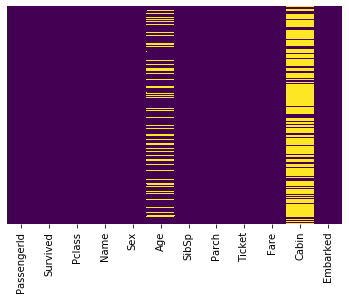

In [7]:
# to see missing values visuvaly sea born is used.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

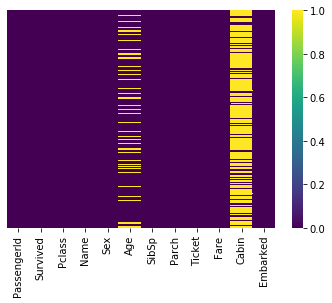

In [8]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=True,cmap="viridis")

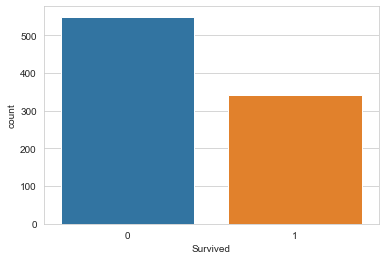

In [24]:
sns.set_style('whitegrid') # number of styles white, dark, whitegrid, darkgrid, ticks
sns.countplot(x='Survived',data=train)

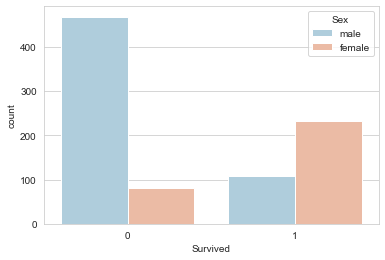

In [28]:
sns.set_style('whitegrid') # number of styles white, dark, whitegrid, darkgrid, ticks
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r') # palette='RdBu_r' color pattern.

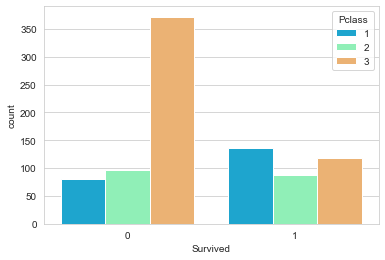

In [31]:
sns.set_style('whitegrid') # number of styles white, dark, whitegrid, darkgrid, ticks
sns.countplot(x='Survived',hue='Pclass', data=train, palette='rainbow')

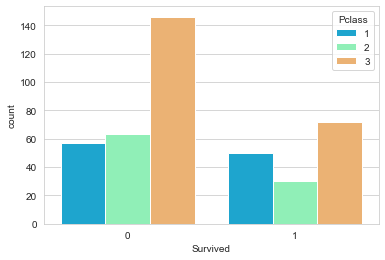

In [29]:
sns.set_style('whitegrid') # number of styles white, dark, whitegrid, darkgrid, ticks
sns.countplot(x='Survived',hue='Pclass', data=test, palette='rainbow')

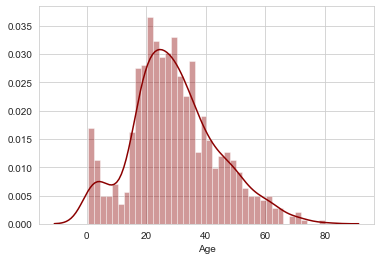

In [34]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40, )

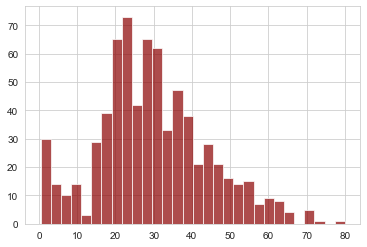

In [35]:
train['Age'].hist(bins=30, color='darkred',alpha=0.7) # darkness in hist

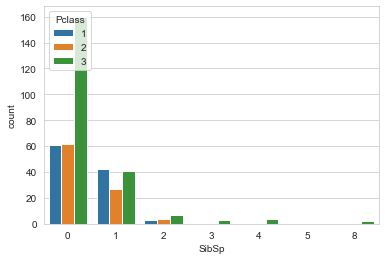

In [40]:
sns.countplot(x='SibSp', hue='Pclass', data=test, )

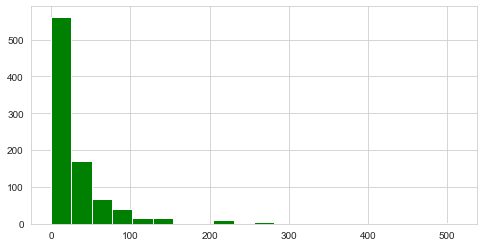

In [41]:
train['Fare'].hist(color='green',bins=20,figsize=(8,4)) #figsize=(8,4) is size of graph diamention.

# Data cleaning
I want to fill in missing age data instead of just droping the missing age rows. one way to do this is by filling in the mean age of the passangers (imputation). 
however it can be smater about this check the average age by passenger class for ex.

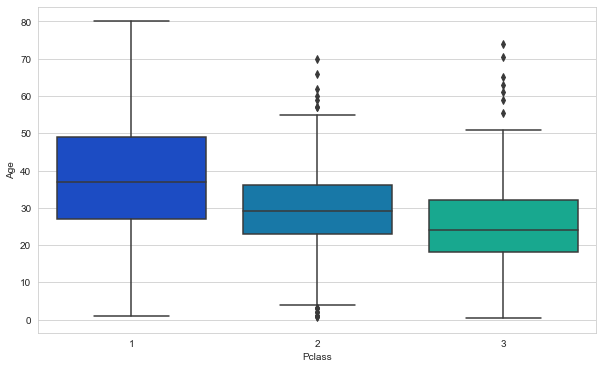

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Here can see the weathier passengers in the higher classes tend to be older. which makes senses .well use these average age values to input based in pclass for age

In [9]:
# pclass 1 mean age is=37
# pclass 2 mean age is=29
# pclass 3 mean age is=24
#Filling the Age null values with mean based on Pclass.

def input_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    
    if pd.isnull(Age):
        if pclass==1:
            return 37
        
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return Age  

In [10]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

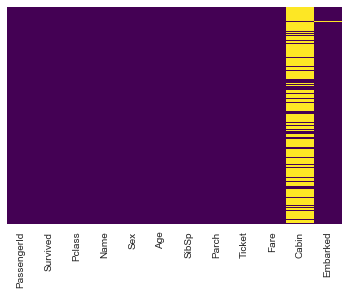

In [225]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabel is y label here index is y that total 891 so kept false

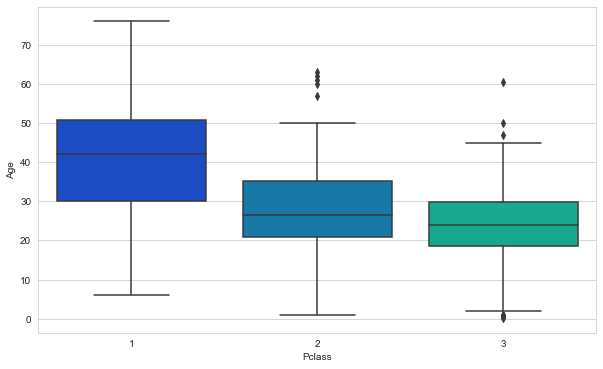

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=test ,palette='winter')

In [11]:
# pclass 1 mean age is=42
# pclass 2 mean age is=26
# pclass 3 mean age is=25
#Filling the Age null values with mean based on Pclass.

def input_age1(cols):
    Age = cols[0]
    pclass = cols[1]
    
    
    if pd.isnull(Age):
        if pclass==1:
            return 42
        
        elif pclass==2:
            return 26
        else:
            return 25
    else:
        return Age  

In [12]:
test['Age']=test[['Age','Pclass']].apply(input_age1,axis=1)

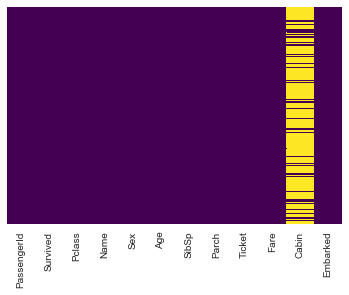

In [66]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabel is y label here index is y that total 891 so kept false

In [13]:
#  in cabin coloumn so many nan value need feature engeeniering so now going to dropping.
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

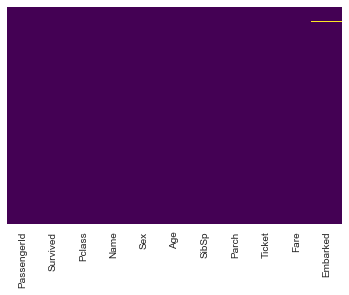

In [229]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabel is y label here index is y that total 891 so kept false

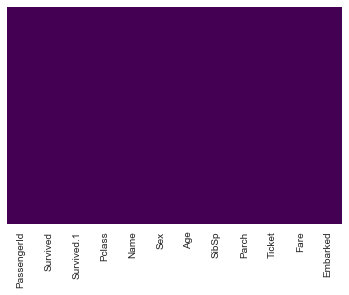

In [230]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabel is y label here index is y that total 891 so kept false

In [14]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# get dummies for train data
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [147]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [149]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [17]:
train = pd.concat([train,sex,embarked],axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
# get dummies for test data
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embarked_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [178]:
embarked_test.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [20]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [155]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [21]:
test= pd.concat([test,sex_test,embarked_test],axis=1)

In [181]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [23]:
test_x.isnull().sum()

NameError: name 'test_x' is not defined

PassengerId    0
Survived.1     0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

### Building a logestic regression model

#### already the train and test data is in avilable so no need to split.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)

In [24]:
train_x=train.drop(["Survived"],axis=1)
train_y=train["Survived"]

In [25]:
train_x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [26]:
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
test_x=test.drop(["Survived"],axis=1)
test_y=test["Survived"]

In [28]:
test_y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [30]:
logmodel.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
ypredict=logmodel.predict(test_x)

In [32]:
titanic_test_compare=pd.DataFrame(test_y)
titanic_test_compare.head()   

,Survived
0,0
1,1
2,0
3,0
4,1


In [33]:
titanic_test_compare["predicted_survive"]=ypredict

In [42]:
titanic_test_compare.head()

,Survived,predicted_survive
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy= confusion_matrix(test_y,ypredict)

In [36]:
accuracy

array([[251,  15],
       [  5, 147]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score= accuracy_score(test_y,ypredict)
accuracy

0.9521531100478469

In [45]:
model_score=logmodel.score(test_x,test_y)

In [46]:
model_score

0.9521531100478469

Text(0.5, 1, 'A plot for confusion matrix')

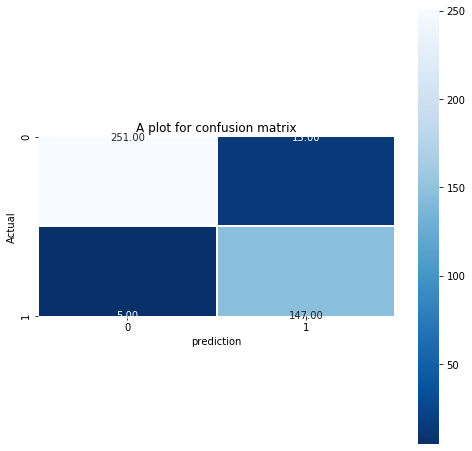

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_y,ypredict), annot=True,linewidths=1, fmt="0.2f", square=True, cmap="Blues_r");
plt.ylabel("Actual");
plt.xlabel('prediction');
plt.title("A plot for confusion matrix")